# **Task 6: K-Nearest Neighbors (KNN) Classification**

---



>Dataset used : Iris Species Dataset

>https://www.kaggle.com/datasets/uciml/iris


In [61]:
#Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# **Loading and Exploring the dataset**

---



In [62]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [63]:
df =pd.read_csv('Iris.csv')
print(df.shape)
display(df.head())

(150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [64]:
print("\n Dataset Info:\n")
df.info()


 Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [65]:
print("\n Summary statistics for numerical columns: \n")

print(df.describe())


 Summary statistics for numerical columns: 

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [66]:
print("\nSummary statistics for categorical columns : \n")
print(df.describe(include='object'))


Summary statistics for categorical columns : 

            Species
count           150
unique            3
top     Iris-setosa
freq             50


In [67]:
print("Checking missing values in the dataset:\n")
print(df.isnull().sum())
print("\nNo missing values found in the dataset.")

Checking missing values in the dataset:

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

No missing values found in the dataset.


## **Features & Target Split**

---



In [68]:
# Defining features (X) and target (y)
X = df.drop("Species", axis=1)
y = df["Species"]

## **Train and test split**

---



In [69]:
# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Feature Scaling(Normalization) is Essential for KNN**

---



In [70]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## **Training the KNN Model on Scaled Data with Different K Values**

---



In [71]:
k_values = range(1, 11)
accuracies = []

In [72]:
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  accuracies.append(acc)
  print(f"K={k} -> Accuracy: {acc:.5f}")

K=1 -> Accuracy: 1.00000
K=2 -> Accuracy: 1.00000
K=3 -> Accuracy: 1.00000
K=4 -> Accuracy: 1.00000
K=5 -> Accuracy: 1.00000
K=6 -> Accuracy: 1.00000
K=7 -> Accuracy: 1.00000
K=8 -> Accuracy: 1.00000
K=9 -> Accuracy: 1.00000
K=10 -> Accuracy: 1.00000


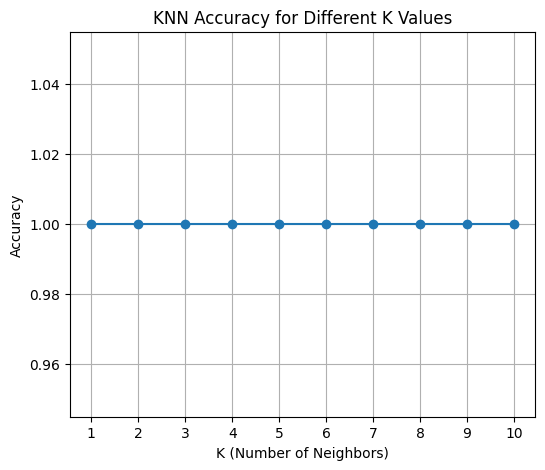

In [73]:
# Plotting Accuracy vs K (n_neighbors)
plt.figure(figsize=(6,5))
plt.plot(k_values, accuracies, marker='o')
plt.title("KNN Accuracy for Different K Values")
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [74]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



## **Choosing Best k value and evaluating**

---



In [75]:
best_k = k_values[accuracies.index(max(accuracies))]
print(f"\nBest K: {best_k}")


Best K: 1


In [76]:
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)


 Final Model Accuracy: 1.0


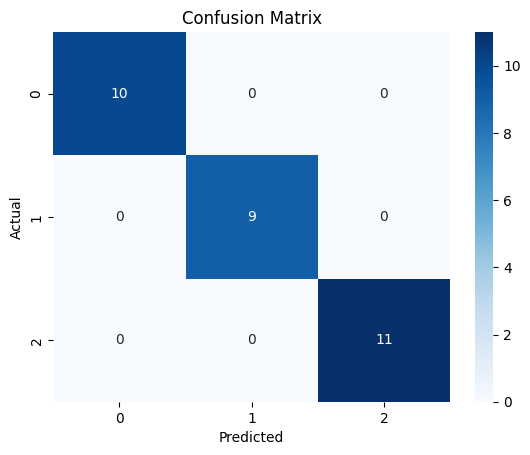


 Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [77]:
print("\n Final Model Accuracy:", accuracy_score(y_test, y_pred_best))
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("\n Classification Report: \n", classification_report(y_test, y_pred_best))

# **Visualizing** **decision boundaries**

---



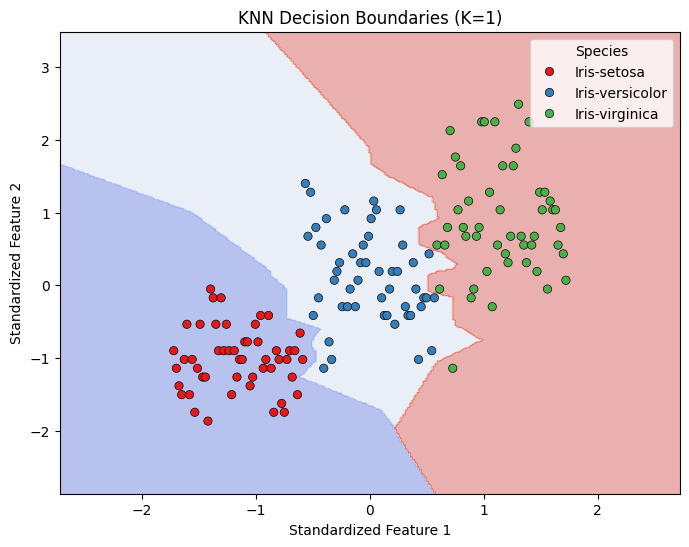

In [78]:
# We'll use only first two features for visualization

X_vis = X_scaled[:, :2]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis, y, test_size=0.2, random_state=42
)

knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_train_vis, y_train_vis)

# meshgrid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict for each mesh point
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = pd.Categorical(Z).codes.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
sns.scatterplot(x=X_vis[:, 0], y=X_vis[:, 1], hue=y, palette="Set1", edgecolor="k")
plt.title(f"KNN Decision Boundaries (K={best_k})")
plt.xlabel("Standardized Feature 1")
plt.ylabel("Standardized Feature 2")
plt.show()